#### 1.0 Importing Dependecies:

In [80]:
# Importing dependencies:
import pandas as pd
import numpy as np
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_color_codes()

# Set custom preferences for displaying and visualizing data
# sns.set_style('white')
pd.set_option('max_colwidth', 120)
pd.set_option('max_columns', 200)
pd.set_option('precision', 2)
plt.rcParams["figure.figsize"] = (10, 7.5)

%matplotlib inline

#### 2.0 Data Analysis:

In [3]:
df = pd.read_csv('data/clean_demographic_transaction.csv')
df.head()

//anaconda3/envs/Springboard/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc,customer_price,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1520,1,0.0,0.0,2.19,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1520,1,0.0,0.0,2.99,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1520,1,0.0,0.0,3.09,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1520,1,0.0,0.0,2.50,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1520,1,0.0,0.0,0.60,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown


#### 2.1 Household Analysis:

#### 2.1.1 Income Distribution:

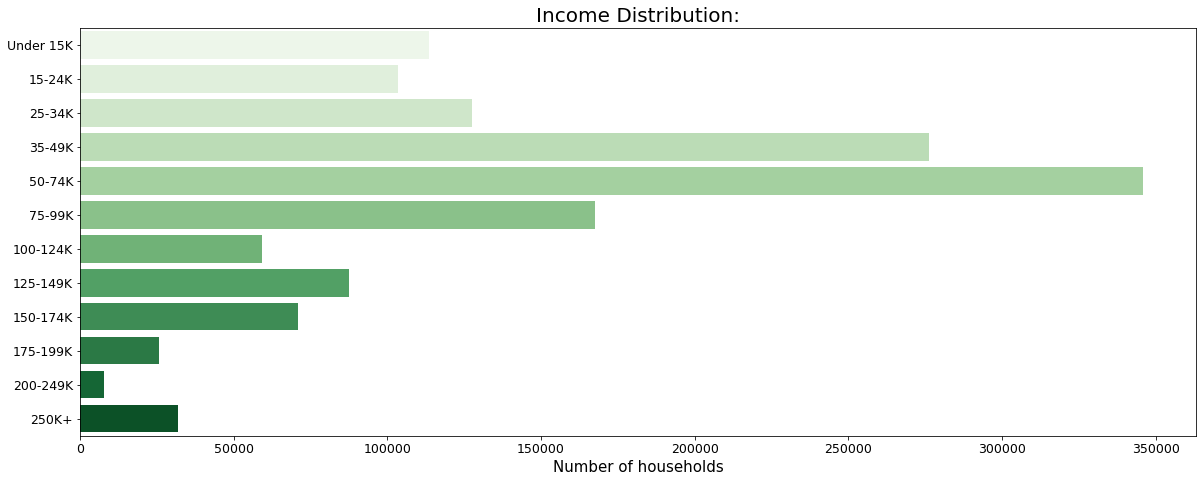

In [4]:
incomes_desc = ['Under 15K', '15-24K', '25-34K', '35-49K', '50-74K', '75-99K', '100-124K', '125-149K', '150-174K', '175-199K', '200-249K', '250K+']
income_count = df['income_desc'].value_counts()

plt.figure(figsize=(20, 7.5))
sns.barplot(x=income_count, y=income_count.index, order=incomes_desc, palette='Greens')
plt.title('Income Distribution:', size=20)
plt.xlabel('Number of households', size=15)
plt.xticks(size=12.5)
plt.yticks(size=12.5)

plt.savefig('graphs/income_distribution.png')
plt.show()

#### 2.1.2 Coupons Usage:

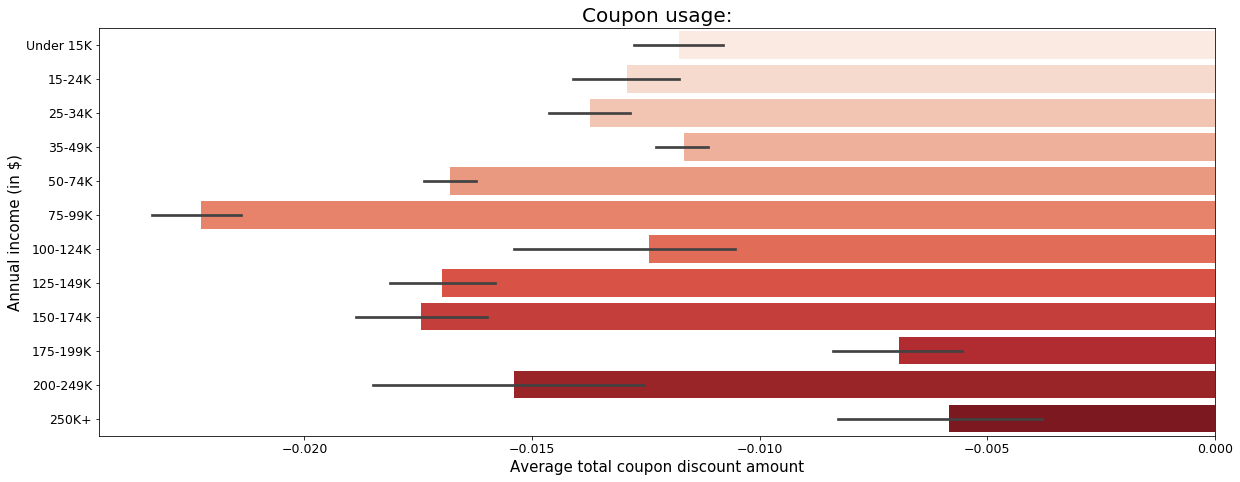

In [5]:
plt.figure(figsize=(20, 7.5))
sns.barplot(y='income_desc', x='coupon_disc', data=df, order=incomes_desc, palette='Reds')
plt.title('Coupon usage:', size=20)
plt.xlabel('Average total coupon discount amount', size=15)
plt.xticks(size=12.5)
plt.ylabel('Annual income (in $)', size=15)
plt.yticks(size=12.5)

plt.savefig('graphs/coupon_usage.png')
plt.show()

#### 2.1.3 Average Purchase Amount:

In [66]:
average_basket = df.groupby(['household_key', 'basket_id'])['customer_price'].sum()
average_basket = average_basket.groupby(['household_key']).mean()

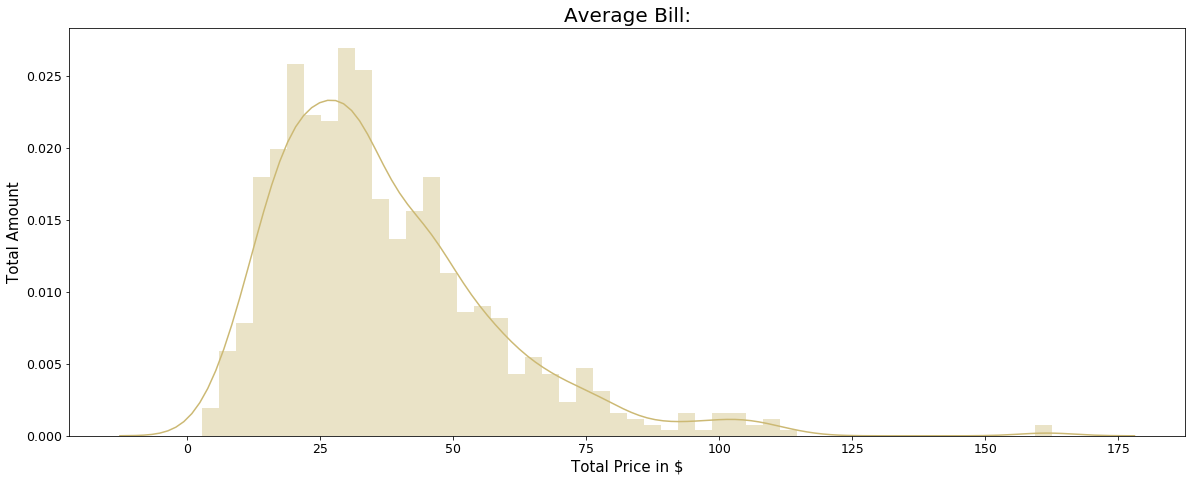

In [85]:
plt.figure(figsize=(20, 7.5))
sns.distplot(average_basket, bins=50, color='y')
plt.title('Average Bill:', size=20)
plt.xlabel('Total Price in $', size=15)
plt.xticks(size=12.5)
plt.ylabel('Total Amount', size=15)
plt.yticks(size=12.5)

plt.savefig('graphs/average_bill.png')
plt.show()

#### 3.1 Product Analysis

#### 3.1.1 Top 15 Products:

In [60]:
top_15 = df['product_id'].value_counts().index
top_15 = top_15[:15]
df_top_15 = df.loc[df['product_id'].isin(top_15)]

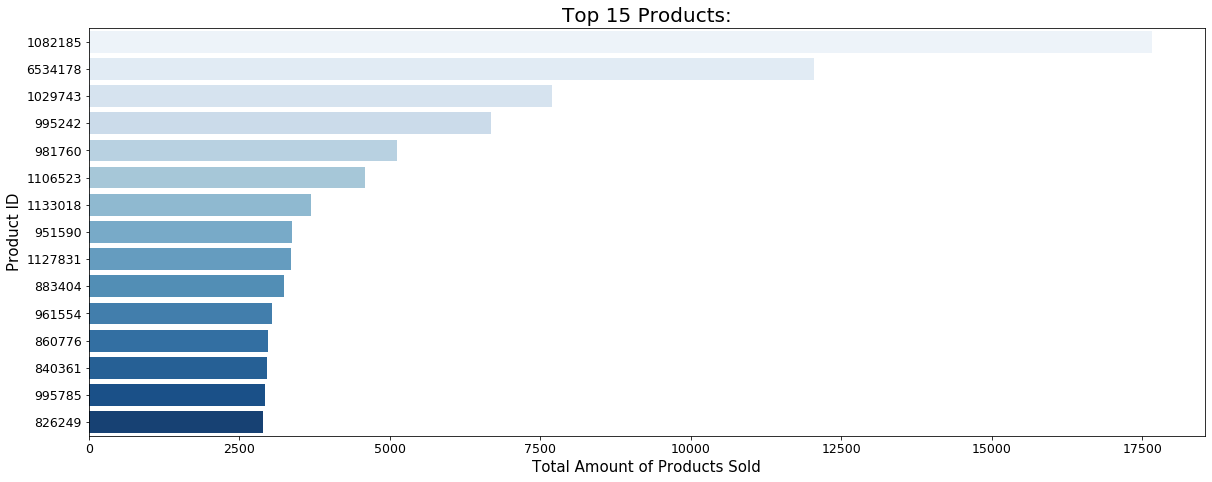

In [69]:
plt.figure(figsize=(20, 7.5))
sns.countplot(y=df['product_id'], order=top_15[:15], palette='Blues')
plt.title('Top 15 Products:', size=20)
plt.xlabel('Total Amount of Products Sold', size=15)
plt.xticks(size=12.5)
plt.ylabel('Product ID', size=15)
plt.yticks(size=12.5)

plt.savefig('graphs/product_distribution.png')
plt.show()

#### 3.1.2 Products sold by date:

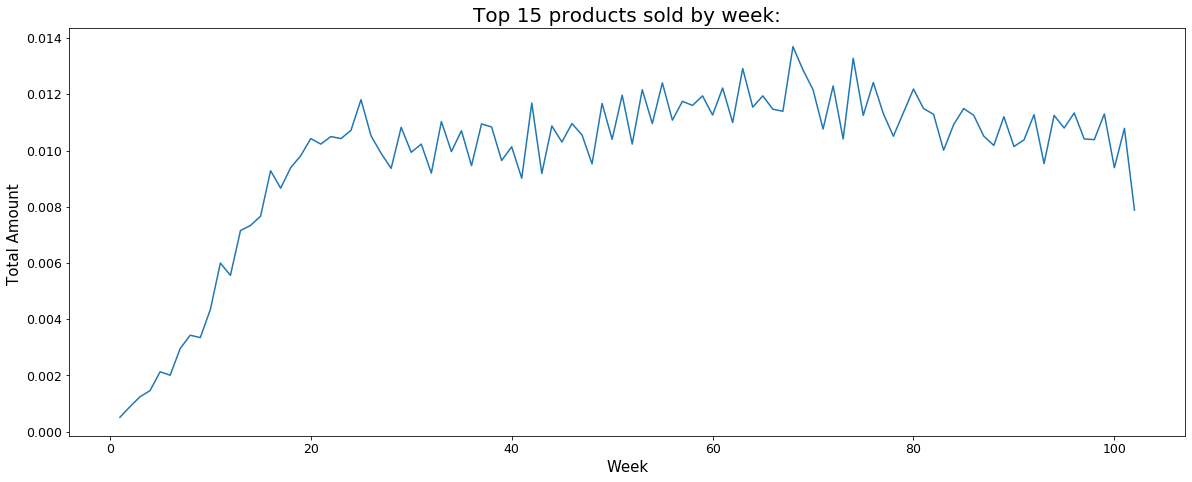

In [63]:
total_weeks = len(df_top_15['week_no'])
week_group = df_top_15.groupby('week_no').agg({'product_id': lambda item: item.count()/total_weeks})

plt.figure(figsize=(20, 7.5))
plt.plot(week_group)
plt.title('Top 15 products sold by week:', size=20)
plt.xlabel('Week', size=15)
plt.xticks(size=12.5)
plt.ylabel('Total Amount ', size=15)
plt.yticks(size=12.5)

plt.savefig('graphs/week_distribution.png')
plt.show()

#### 3.1.3 Average Price Paid By Customer When Top 15 Where Purchasesd:

In [73]:
top_average_basket = df_top_15.groupby(['household_key', 'basket_id'])['customer_price'].sum()
top_average_basket = top_average_basket.groupby(['household_key']).mean()

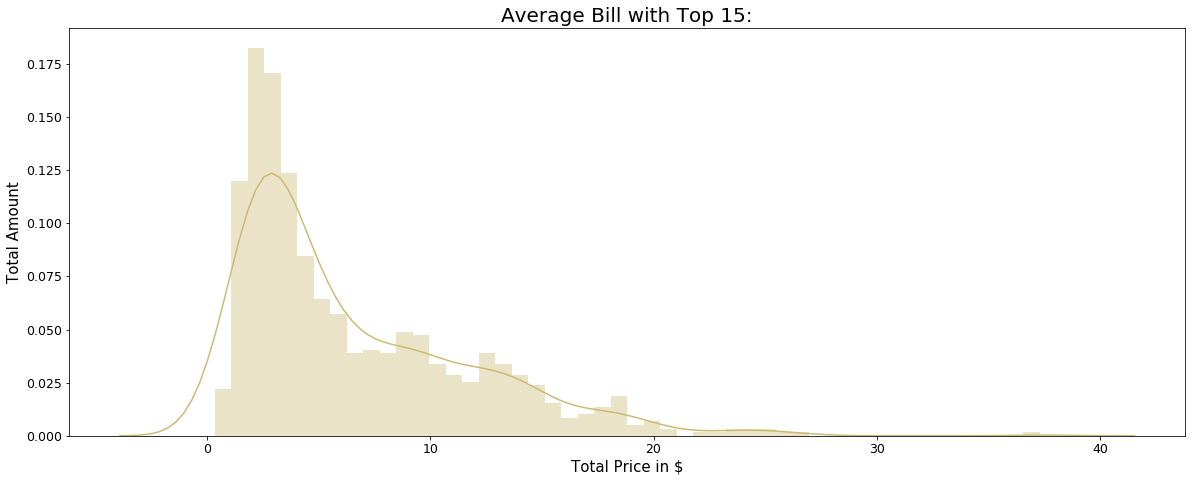

In [88]:
plt.figure(figsize=(20, 7.5))
sns.distplot(top_average_basket, bins=50, color='y')
plt.title('Average Bill with Top 15:', size=20)
plt.xlabel('Total Price in $', size=15)
plt.xticks(size=12.5)
plt.ylabel('Total Amount', size=15)
plt.yticks(size=12.5)

plt.savefig('graphs/top_average_bill.png')
plt.show()